**Build an ANN model for Drug classification.**

**Task 1: Read the dataset and do data pre-processing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drug_classification.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: ylabel='Drug'>

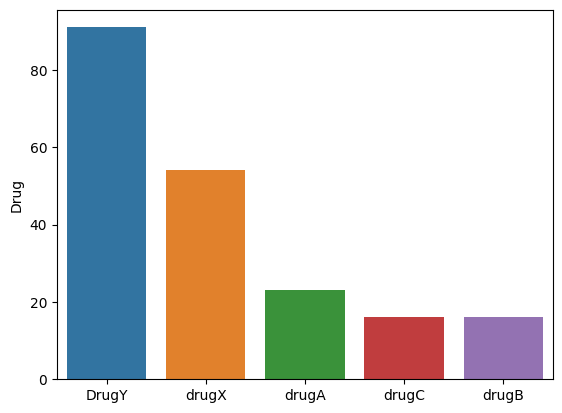

In [9]:
sns.barplot(x=df.Drug.value_counts().index,y=df.Drug.value_counts())

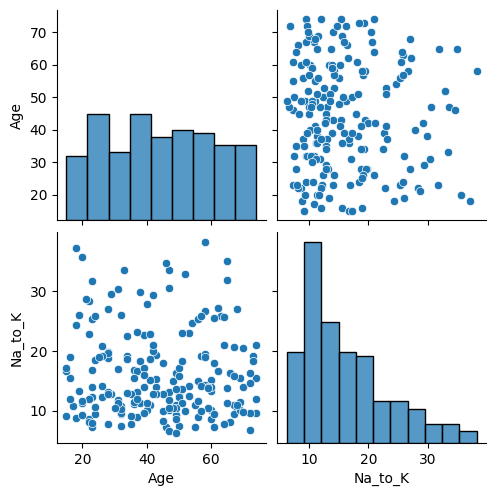

In [11]:
sns.pairplot(df)

In [18]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


<Axes: >

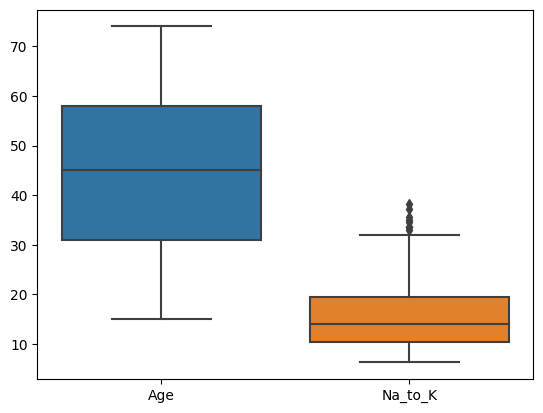

In [19]:
sns.boxplot(df)

**Splitting the data**

In [62]:
#Separate features and labels
x = df.drop('Drug', axis=1)
y = df['Drug']

In [63]:
#Encode Categorical Values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [64]:
#Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=11)

print('Sex : ',df['Sex'],'\n')
print('BP : \n',df['BP'],'\n')
print('Cholesterol : \n',df['Cholesterol'],'\n')
print('Drug : \n',df['Drug'],'\n')

Sex :  0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64 

BP : 
 0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64 

Cholesterol : 
 0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64 

Drug : 
 0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64 



**Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)**

In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
drug_model =Sequential()
drug_model.add(Dense(64, activation='relu', input_shape=(5,)))
drug_model.add(layers.Dense(128, activation='relu'))
drug_model.add(layers.Dense(64, activation='relu'))
drug_model.add(layers.Dense(32, activation='relu'))
drug_model.add(layers.Dense(1, activation='sigmoid'))

#Compile the model
drug_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


#Training the model
drug_model.fit(xtrain,ytrain,batch_size=4,epochs=10)

Epoch 1/10
38/38 [==============================] - 2s 3ms/step - loss: -7.7817 - accuracy: 0.1333
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: -50.7190 - accuracy: 0.1067
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: -313.6496 - accuracy: 0.1133
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: -1551.7656 - accuracy: 0.1133
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: -6067.1572 - accuracy: 0.1067
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: -18690.1211 - accuracy: 0.1067
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: -48665.8203 - accuracy: 0.1067
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: -117445.2969 - accuracy: 0.1067
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: -253740.5000 - accuracy: 0.1067
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: -457354.8

**Task 3: Test the model with random data**

In [86]:
random_data = np.array([[32,436,135.953, 21.352,86.54]])
prediction = drug_model.predict(random_data)
predicted_drug = label_encoder.inverse_transform(np.argmax(prediction,axis = 1))
print('Predicted Drug Class: ',predicted_drug)

1/1 [==============================] - 0s 26ms/step
Predicted Drug Class:  [0]
